### Compare data sources using a single ML model

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from load_modules import *
%matplotlib inline
fpath = Path(os.getcwd())
print('Current path:', fpath)

Current path: /vol/ml/apartin/projects/dr-learning-curves/nbs


In [2]:
# Settings
drop_bad_r2fit = False
# drop_bad_r2fit = True
dpi = 200

## Path to data

In [3]:
fname = 'all_scores.csv'
# dpath = Path('../lc.out.summit.July2020/exp_1_and_2')
# dirs = glob(str(dpath/'*'))
# print(dirs)

In [4]:
# dGBDT
model = 'dGBDT'
gdsc1_path = Path('../lc.out.new.r2fit_03/', f'lc.gdsc1.lgb.dflt', fname)
gdsc2_path = Path('../lc.out.new.r2fit_03/', f'lc.gdsc2.lgb.dflt', fname)
ctrp_path = Path('../lc.out.new.r2fit_03/', f'lc.ctrp.lgb.dflt', fname)
nci_path = Path('../lc.out.nci60.lgb/lc.nci60.lgb.dflt', fname)

# mNN
"""
TODO!
Consider experiment. Build ML dfs for each source to contain the same number of training samples.
The total sample size is defined by the smallest dataset (GDSC2).
Generate LC using nn_reg1 (mNN) for each source and compare LC plots.
"""
# model = 'mNN'
# gdsc1_path = Path('../lc.out.new.r2fit_03/', f'lc.gdsc1.nn_reg1.ls_hpo', fname)
# gdsc2_path = Path('../lc.out.new.r2fit_03/', f'lc.gdsc2.nn_reg1.ls_hpo', fname)
# ctrp_path = Path('../lc.out.new.r2fit_03/', f'lc.ctrp.nn_reg1.ls_hpo', fname)
# nci_path = Path('../lc.out.summit.July2020/exp_1_and_2/lc.nci60.nn_reg1.random.ls_hpo', fname)

'\nTODO!\nConsider experiment. Build ML dfs for each source to contain the same number of training samples.\nThe total sample size is defined by the smallest dataset (GDSC2).\nGenerate LC using nn_reg1 (mNN) for each source and compare LC plots.\n'

In [5]:
outpath = fpath/f'single_model_multi_src'
os.makedirs(outpath, exist_ok=True)

## Load data

In [6]:
gdsc1 = load_data(gdsc1_path, tr_set='te');
gdsc2 = load_data(gdsc2_path, tr_set='te');
ctrp = load_data(ctrp_path, tr_set='te');
nci = load_data(nci_path, tr_set='te');

In [7]:
print_count(aa=gdsc1)
print_count(aa=gdsc2)
print_count(aa=ctrp)
print_count(aa=nci)

,tr_size,one
0,10,20
1,12,20
2,16,20
3,20,20
4,26,20
5,33,20
6,42,20
7,53,20
8,68,20
9,86,20


,tr_size,one
0,10,20
1,12,20
2,15,20
3,19,20
4,25,20
5,31,20
6,39,20
7,50,20
8,62,20
9,79,20


,tr_size,one
0,10,20
1,12,20
2,14,20
3,18,20
4,22,20
5,27,20
6,33,20
7,41,20
8,50,20
9,61,20


,tr_size,one
0,10,20
1,12,20
2,15,20
3,19,20
4,24,20
5,31,20
6,39,20
7,48,20
8,61,20
9,77,20


In [8]:
if drop_bad_r2fit:
    gdsc1 = drop_bad_r2(gdsc1)
    gdsc2 = drop_bad_r2(gdsc2)
    ctrp  = drop_bad_r2(ctrp)
    nci   = drop_bad_r2(nci)

## Raw plots

In [9]:
# Global plotting params
# -------------------------------
met = 'mean_absolute_error';  # startParams = {'a': 1.2, 'b': -0.4, 'c': 0.04}

t_set = 'te'
xtick_scale = 'log2'
ytick_scale = 'log2'
# xtick_scale = 'linear'
# ytick_scale = 'linear'

kwargs = {'metric_name': met,
          'tr_set': t_set,
          'xtick_scale': xtick_scale,
          'ytick_scale': ytick_scale,
          'plot_median': True}

legend_fontsize = 13

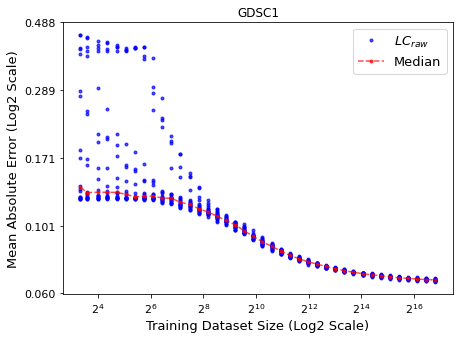

In [10]:
# Plot dGBDT (GDSC1)
# -------------------------------
name = 'GDSC1'
kwargs.update({'title': f'{name}'})
ax = lc_plots.plot_lc_single_metric(gdsc1, **kwargs);
ax.legend(frameon=True, fontsize=legend_fontsize, loc='best')
ax.grid(False)

if drop_bad_r2fit:
    plt.savefig(outpath/f'{model}_{name}_drop_bad_r2fit.png', dpi=dpi)
else:
    plt.savefig(outpath/f'{model}_{name}.png', dpi=dpi)

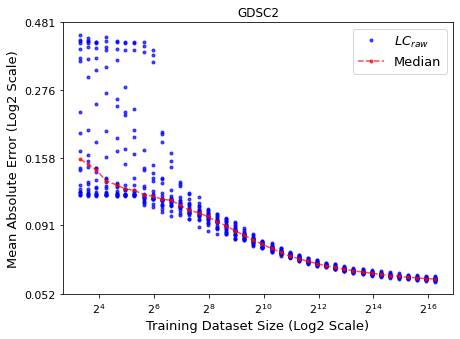

In [11]:
# Plot dGBDT (GDSC2)
# -------------------------------
name = 'GDSC2'
kwargs.update({'title': f'{name}'})
ax = lc_plots.plot_lc_single_metric(gdsc2, **kwargs);
ax.legend(frameon=True, fontsize=legend_fontsize, loc='best')
ax.grid(False)

if drop_bad_r2fit:
    plt.savefig(outpath/f'{model}_{name}_drop_bad_r2fit.png', dpi=dpi)
else:
    plt.savefig(outpath/f'{model}_{name}.png', dpi=dpi)

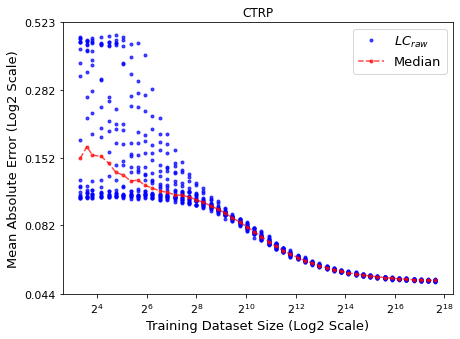

In [12]:
# Plot dGBDT (CTRP)
# -------------------------------
name = 'CTRP'
kwargs.update({'title': f'{name}'})
ax = lc_plots.plot_lc_single_metric(ctrp, **kwargs);
ax.legend(frameon=True, fontsize=legend_fontsize, loc='best')
ax.grid(False)

if drop_bad_r2fit:
    plt.savefig(outpath/f'{model}_{name}_drop_bad_r2fit.png', dpi=dpi)
else:
    plt.savefig(outpath/f'{model}_{name}.png', dpi=dpi)

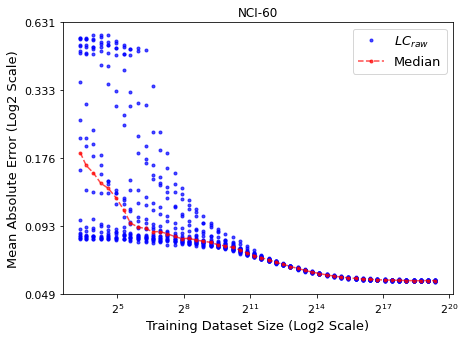

In [14]:
# Plot dGBDT (NCI60)
# -------------------------------
name = 'NCI-60'
kwargs.update({'title': f'{name}'})
ax = lc_plots.plot_lc_single_metric(nci, **kwargs);
ax.legend(frameon=True, fontsize=legend_fontsize, loc='best')
ax.grid(False)

if drop_bad_r2fit:
    plt.savefig(outpath/f'{model}_{name}_drop_bad_r2fit.png', dpi=dpi)
else:
    plt.savefig(outpath/f'{model}_{name}.png', dpi=dpi)

## Fitting

In [15]:
# Split dfit and dext
# x_fit_mn = 1000; x_fit_mx = None
x_fit_mn = 10000; x_fit_mx = None
startParams = {'a': 1.2, 'b': -0.3, 'c': 0.04}

dfit_gdsc1 = fit_data(gdsc1, x_fit_mn=x_fit_mn, x_fit_mx=x_fit_mx)
dfit_gdsc2 = fit_data(gdsc2, x_fit_mn=x_fit_mn, x_fit_mx=x_fit_mx)
dfit_ctrp  = fit_data(ctrp, x_fit_mn=x_fit_mn, x_fit_mx=x_fit_mx)
dfit_nci   = fit_data(nci, x_fit_mn=x_fit_mn, x_fit_mx=x_fit_mx)

In [16]:
pnts_args = {'metric_name': met, 'xtick_scale': xtick_scale, 'ytick_scale': ytick_scale, 'alpha': 0.7, 'ls': '', 'marker': '.'}
fit_args = {'metric_name': met, 'xtick_scale': xtick_scale, 'ytick_scale': ytick_scale, 'alpha': 0.7, 'ls': '--', 'marker': ''}

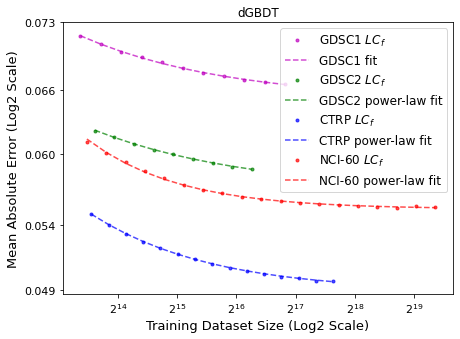

In [34]:
ax = None
fit_method = 'old'
# fit_method = 'new'

# -----------------------------
#   GDSC1
# -----------------------------
if gdsc1 is not None:
    aa = dfit_gdsc1
    name = 'GDSC1'
    color = 'm'
    
    xf = aa['tr_size'].values
    yf = aa['y'].values
    
    if fit_method == 'new':
        cc_lgb = FitPwrLaw(xf=xf, yf=yf, w=aa['w'].values, **startParams)  # new!
        xf_plot, yf_plot = cc_lgb.calc_fit( x1=xf[0], x2=xf[-1] )
        cc_lgb_dft = cc_lgb
    else:
        # Old fit method (see single single_src.ipynb)  
        prms_lgb_dft = fit_params(x=xf, y=yf)
        yf_plot = biased_powerlaw(xf, **prms_lgb_dft)
        xf_plot = xf
    
    ax = lc_plots.plot_lc(x=xf, y=yf, ax=ax, **pnts_args, color=color, label=f'{name} ' + '$LC_{f}$')
    ax = lc_plots.plot_lc(x=xf_plot, y=yf_plot, ax=ax, **fit_args, color=color, label=f'{name} fit')

# -----------------------------
#   GDSC2
# -----------------------------
if gdsc2 is not None:
    aa = dfit_gdsc2
    name = 'GDSC2'
    color = 'g'
    
    xf = aa['tr_size'].values
    yf = aa['y'].values
    
    if fit_method == 'new':
        cc_lgb = FitPwrLaw(xf=xf, yf=yf, w=aa['w'].values, **startParams)  # new!
        xf_plot, yf_plot = cc_lgb.calc_fit( x1=xf[0], x2=xf[-1] )
        cc_lgb_hpo = cc_lgb
    else:    
        # Old fit method (see single single_src.ipynb) 
        prms_lgb_hpo = fit_params(x=xf, y=yf)
        yf_plot = biased_powerlaw(xf, **prms_lgb_hpo)
        xf_plot = xf  
    
    ax = lc_plots.plot_lc(x=xf, y=yf, ax=ax, **pnts_args, color=color, label=f'{name} ' + '$LC_{f}$')
    ax = lc_plots.plot_lc(x=xf_plot, y=yf_plot, ax=ax, **fit_args, color=color, label=f'{name} power-law fit') 
    
# -----------------------------    
#   CTRP
# -----------------------------
if ctrp is not None:
    aa = dfit_ctrp    
    name = 'CTRP'
    color = 'b'
    
    xf = aa['tr_size'].values
    yf = aa['y'].values
    
    if fit_method == 'new':
        cc_nn0 = FitPwrLaw(xf=xf, yf=yf, w=aa['w'].values, **startParams)  # new!
        xf_plot, yf_plot = cc_nn0.calc_fit( x1=xf[0], x2=xf[-1] )
    else:
        # Old fit method (see single single_src.ipynb)  
        prms_nn0 = fit_params(x=xf, y=yf)
        yf_plot = biased_powerlaw(xf, **prms_nn0)
        xf_plot = xf   
    
    ax = lc_plots.plot_lc(x=xf, y=yf, ax=ax, **pnts_args, color=color, label=f'{name} ' + '$LC_{f}$')
    ax = lc_plots.plot_lc(x=xf_plot, y=yf_plot, ax=ax, **fit_args, color=color, label=f'{name} power-law fit')

# -----------------------------    
#   NCI-60
# -----------------------------
if nci is not None:
    aa = dfit_nci
    name = 'NCI-60'
    color = 'r'
    
    xf = aa['tr_size'].values
    yf = aa['y'].values
    
    if fit_method == 'new':
        cc_nn1 = FitPwrLaw(xf=xf, yf=yf, w=aa['w'].values, **startParams)  # new!
        xf_plot, yf_plot = cc_nn1.calc_fit( x1=xf[0], x2=xf[-1] )
    else:
        # Old fit method (see single single_src.ipynb) 
        prms_nn1 = fit_params(x=xf, y=yf)
        yf_plot = biased_powerlaw(xf, **prms_nn1)
        xf_plot = xf
    
    ax = lc_plots.plot_lc(x=xf, y=yf, ax=ax, **pnts_args, color=color, label=f'{name} ' + '$LC_{f}$')
    ax = lc_plots.plot_lc(x=xf_plot, y=yf_plot, ax=ax, **fit_args, color=color, label=f'{name} power-law fit')


ax.set_title(f'{model}')
ax.legend(frameon=True, fontsize=12, loc='best')
ax.grid(False)
# plt.savefig(outpath/f'{src}_fits.png', dpi=dpi)

In [18]:
# print('nn0')
# display(cc_nn0.coefs)
# print('nn1')
# display(cc_nn1.coefs)
# print('lgb_hpo')
# display(cc_lgb_hpo.coefs)
# print('lgb_dft')
# display(cc_lgb_dft.coefs)

In [19]:
# display(prms_nn0)
# display(prms_nn1)
# display(prms_lgb_hpo)
# display(prms_lgb_dft)

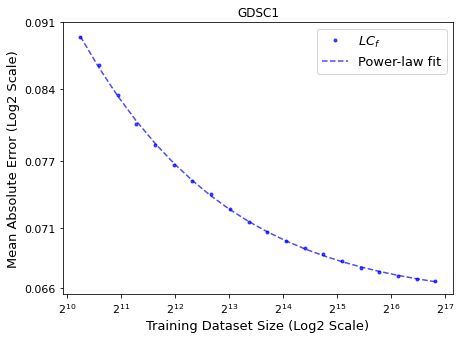

In [35]:
ax = None
fit_method = 'old'
# fit_method = 'new'

# ------------------------------------------------------------------
# NOTE! Uncomment each row to plot and save each figure
# ------------------------------------------------------------------
data=gdsc1; name='GDSC1'; x_fit_mn=1000; x_fit_mx=None;
# data=gdsc2; name='GDSC2'; x_fit_mn=1000; x_fit_mx=None;
# data=ctrp; name='CTRP'; x_fit_mn=1000; x_fit_mx=None;
# data=nci; name='NCI-60'; x_fit_mn=10000; x_fit_mx=None; # startParams={'a': 2.5, 'b': -0.6, 'c': 0.05}

aa = fit_data(data, x_fit_mn=x_fit_mn, x_fit_mx=x_fit_mx, method='binomial')
dfit_all = fit_data(data, x_fit_mn=0, x_fit_mx=x_fit_mx, method='binomial')
color = 'b'

xf = aa['tr_size'].values
yf = aa['y'].values

if fit_method == 'new':
    cc = FitPwrLaw(xf=xf, yf=yf, w=aa['w'].values, **startParams)  # new!
    xf_plot, yf_plot = cc.calc_fit( x1=xf[0], x2=xf[-1] )
else:
    # Old fit method (see single single_src.ipynb)  
    prms = fit_params(x=xf, y=yf)
    yf_plot = biased_powerlaw(xf, **prms)
    xf_plot = xf

# ----------
# All points
# ----------
# x_all = dfit_all['tr_size'].values
# y_all = dfit_all['y'].values
# pnts_args_all = {'metric_name': met, 'xtick_scale': xtick_scale, 'ytick_scale': ytick_scale, 'alpha': 0.5, 'ls': '', 'marker': 'p'}
# ax = lc_plots.plot_lc(x=x_all, y=y_all, ax=ax, **pnts_args_all, color='k', label=f'LC all data')
# color = 'g'

# ----------
# Fit points
# ----------
ax = lc_plots.plot_lc(x=xf, y=yf, ax=ax, **pnts_args, color=color, label='$LC_{f}$ data')
ax = lc_plots.plot_lc(x=xf_plot, y=yf_plot, ax=ax, **fit_args, color=color, label=f'Power-law fit')

ax.set_title(f'{name}')
ax.legend(frameon=True, fontsize=13, loc='best')
ax.grid(False)

if drop_bad_r2fit:
    plt.savefig(outpath/f'{model}_{name}_drop_bad_r2fit_fit.png', dpi=dpi)
else:
    plt.savefig(outpath/f'{model}_{name}_fit.png', dpi=dpi)

In [21]:
# display(cc.coefs)

In [22]:
prms

{'alpha': 55.50113797986744,
 'beta': -0.9768530170004217,
 'gamma': 0.055278621885021195}

In [27]:
# aa = nn0
# aa['std'] = aa['score']
# aa['min'] = aa['score']
# aa['max'] = aa['score']
# aa = aa.groupby(['tr_size']).agg({'score': 'median', 'std': 'std', 'min': 'min', 'max': 'max'}).reset_index()
# score_name = f'{met}_median'
# aa = aa.rename(columns={'score': score_name})
# aa['%'] = aa['std']/aa[score_name]
# aa

In [28]:
# aa = nn1
# aa['std'] = aa['score']
# aa['min'] = aa['score']
# aa['max'] = aa['score']
# aa = aa.groupby(['tr_size']).agg({'score': 'median', 'std': 'std', 'min': 'min', 'max': 'max'}).reset_index()
# score_name = f'{met}_median'
# aa = aa.rename(columns={'score': score_name})
# aa['%'] = aa['std']/aa[score_name]
# aa

In [29]:
# aa = lgb_hpo
# aa['std'] = aa['score']
# aa['min'] = aa['score']
# aa['max'] = aa['score']
# aa = aa.groupby(['tr_size']).agg({'score': 'median', 'std': 'std', 'min': 'min', 'max': 'max'}).reset_index()
# score_name = f'{met}_median'
# aa = aa.rename(columns={'score': score_name})
# aa['%'] = aa['std']/aa[score_name]
# aa

In [30]:
# aa = lgb_dft
# aa['std'] = aa['score']
# aa['min'] = aa['score']
# aa['max'] = aa['score']
# aa = aa.groupby(['tr_size']).agg({'score': 'median', 'std': 'std', 'min': 'min', 'max': 'max'}).reset_index()
# score_name = f'{met}_median'
# aa = aa.rename(columns={'score': score_name})
# aa['%'] = aa['std']/aa[score_name]
# aa